# Credit Card Default Risk Scoring and Customer Profiling
Performed exploratory data analysis and predictive modeling to estimate the probability of credit card default using financial and demographic data. Implemented risk scoring and customer segmentation techniques to identify high-risk groups to support targeted risk mitigation strategies.
Default = 180 Days

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
sns.set_palette("viridis")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

# Get Data

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
raw = pd.read_csv('data/UCI_Credit_Card.csv')
display(raw.shape)
display(raw.head())
display(raw.describe())
display(raw.dtypes)

(30000, 25)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Remapping and Log Limit Balance

In [4]:
sex_map = {1: 'Male',
       2: 'Female'
       }

edu_map = {1: 'Graduate school',
           2: 'University',
           3: 'High school',
           4: 'Others',
           5: 'Unknown',
           6: 'Unknown'
           }

marry_map = {1: 'Married',
             2: 'Single',
             3: 'Others' # assuming it can be widowed, divorced, prefer not to say, etc
             }


In [5]:
pay_cols = [f'PAY_AMT{x}' for x in range(1, 7)]
pay_cols_log = [f'PAY_AMT{x}_log' for x in range(1, 7)]

print(pay_cols)
print(pay_cols_log)

['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
['PAY_AMT1_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log']


In [6]:
df_mapped = raw.copy()
df_mapped['SEX'] = df_mapped['SEX'].map(sex_map)
df_mapped['EDUCATION'] = df_mapped['EDUCATION'].map(edu_map)
df_mapped['MARRIAGE'] = df_mapped['MARRIAGE'].map(marry_map)

df_mapped[pay_cols_log] = df_mapped[pay_cols].apply(lambda x: np.log1p(x))
df_mapped['LIMIT_BAL_log'] = np.log(df_mapped['LIMIT_BAL'])

# mapping target col only for eda
df_eda = df_mapped.copy()
df_eda['default.payment.next.month'] = df_eda['default.payment.next.month'].map({1: 'Default', 0: 'Paid'})

df_eda.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_AMT1_log,PAY_AMT2_log,PAY_AMT3_log,PAY_AMT4_log,PAY_AMT5_log,PAY_AMT6_log,LIMIT_BAL_log
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,Default,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,9.903488
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,0.0,2000.0,Default,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,11.695247
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,1000.0,5000.0,Paid,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,11.407565
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,1069.0,1000.0,Paid,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,10.819778
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,689.0,679.0,Paid,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,10.819778


# Exploratory Data Analysis

In [7]:
cat_cols = df_eda.select_dtypes(include='object').columns.tolist()

print(df_eda.columns)
print(cat_cols)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PAY_AMT1_log', 'PAY_AMT2_log',
       'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log',
       'LIMIT_BAL_log'],
      dtype='object')
['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']


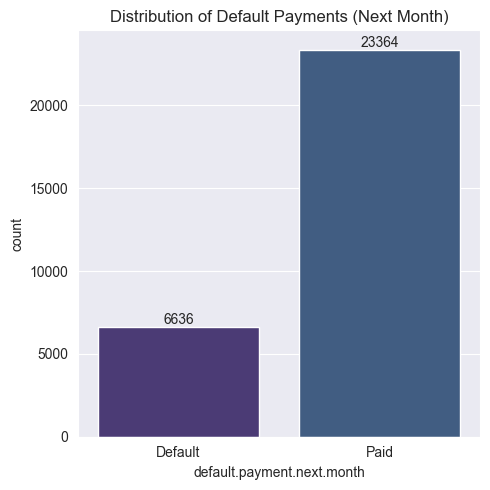

In [8]:
plt.figure(figsize=(5,5))

ax = sns.countplot(data=df_eda, x='default.payment.next.month')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Default Payments (Next Month)')

plt.tight_layout()
plt.show()

## Demographic

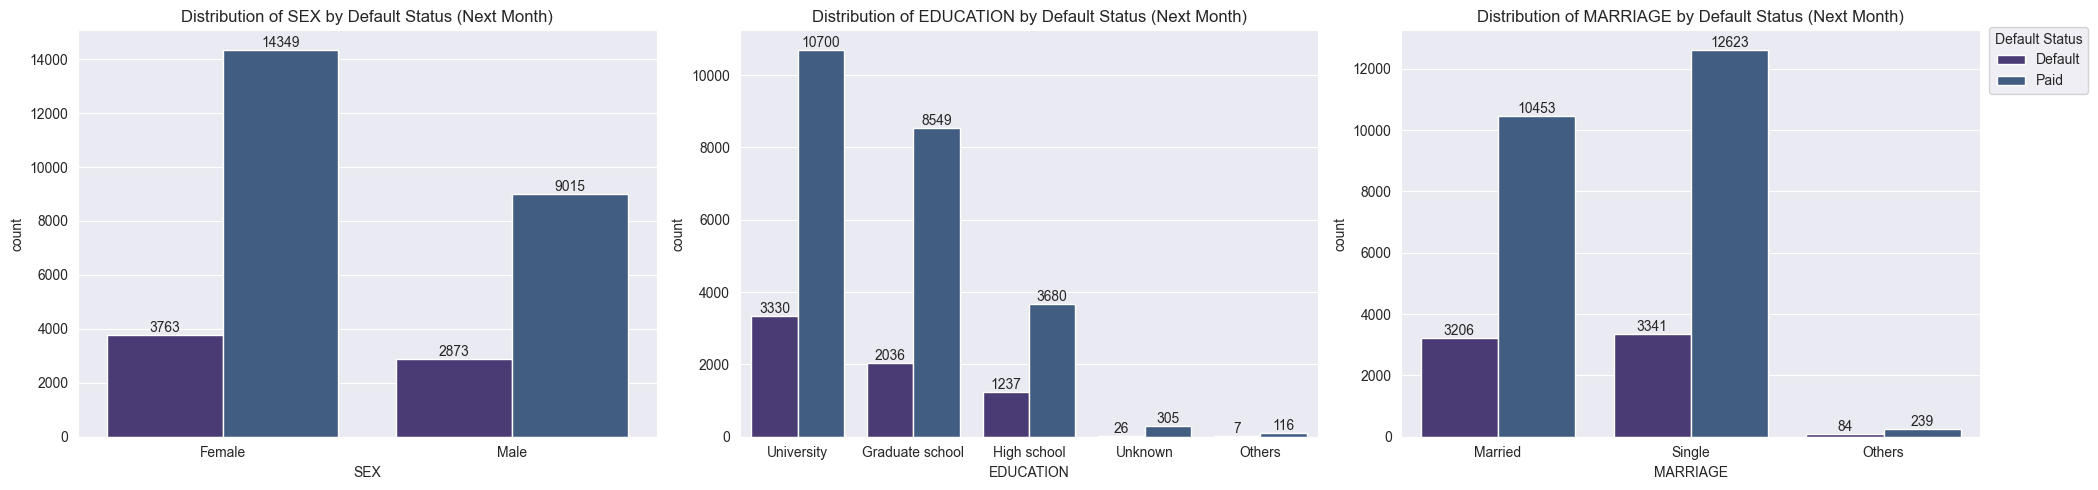

In [9]:
fig, axes = plt.subplots(1, len(cat_cols[:-1]), figsize=(5 * len(cat_cols), 5))

for i, col in enumerate(cat_cols[:-1]):
    title = 'Distribution of ' + col + ' by Default Status (Next Month)'
    
    ax = sns.countplot(df_eda, x=col, ax=axes[i], hue='default.payment.next.month')
    
    for container in ax.containers:
        ax.bar_label(container)
    
    axes[i].set_title(title)
    axes[i].legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 0.95), title="Default Status")

plt.tight_layout()
plt.show()


Mean for  Default : 35.72573839662447
Median for  Default : 34.0
Mean for  Paid : 35.417265879130284
Median for  Paid : 34.0


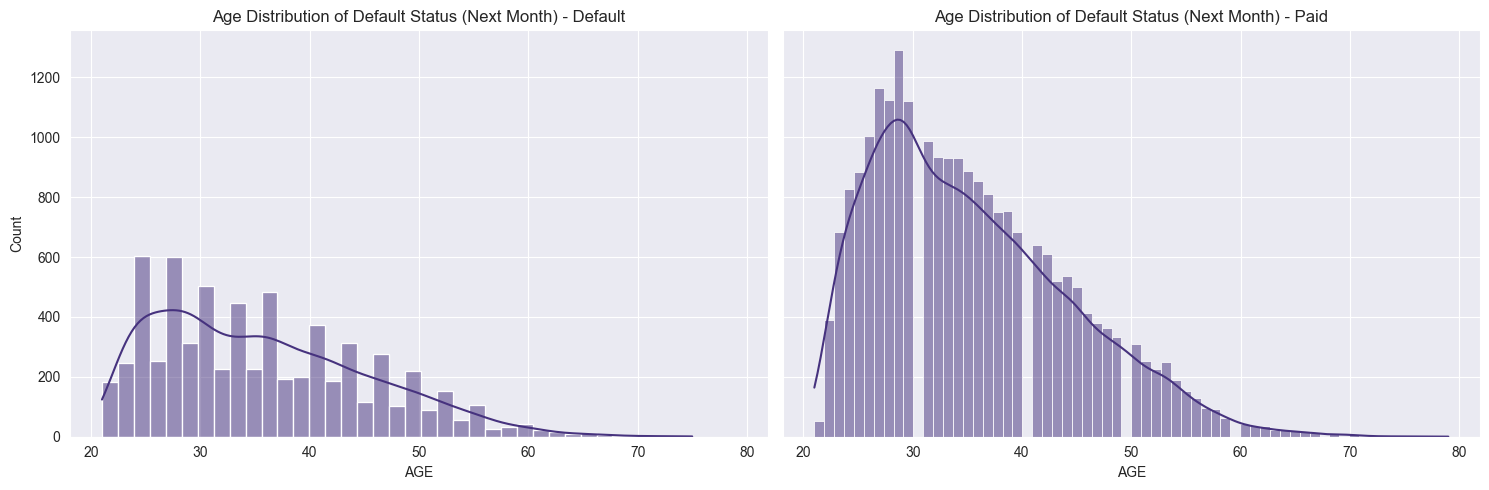

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

for i, hue in enumerate(df_eda['default.payment.next.month'].unique()):
    title = 'Age Distribution of Default Status (Next Month) - ' + hue
    
    filter = df_eda[df_eda['default.payment.next.month'] == hue]
    
    ax = sns.histplot(data=filter, x='AGE', kde=True, ax=axes[i])
        
    axes[i].set_title(title)
    
    print('Mean for ', hue, ':', filter['AGE'].mean())
    print('Median for ', hue, ':', filter['AGE'].median())

plt.tight_layout()
plt.show()

Mean for  Default : 130109.65641952984
Median for  Default : 90000.0
Mean for  Paid : 178099.72607430234
Median for  Paid : 150000.0


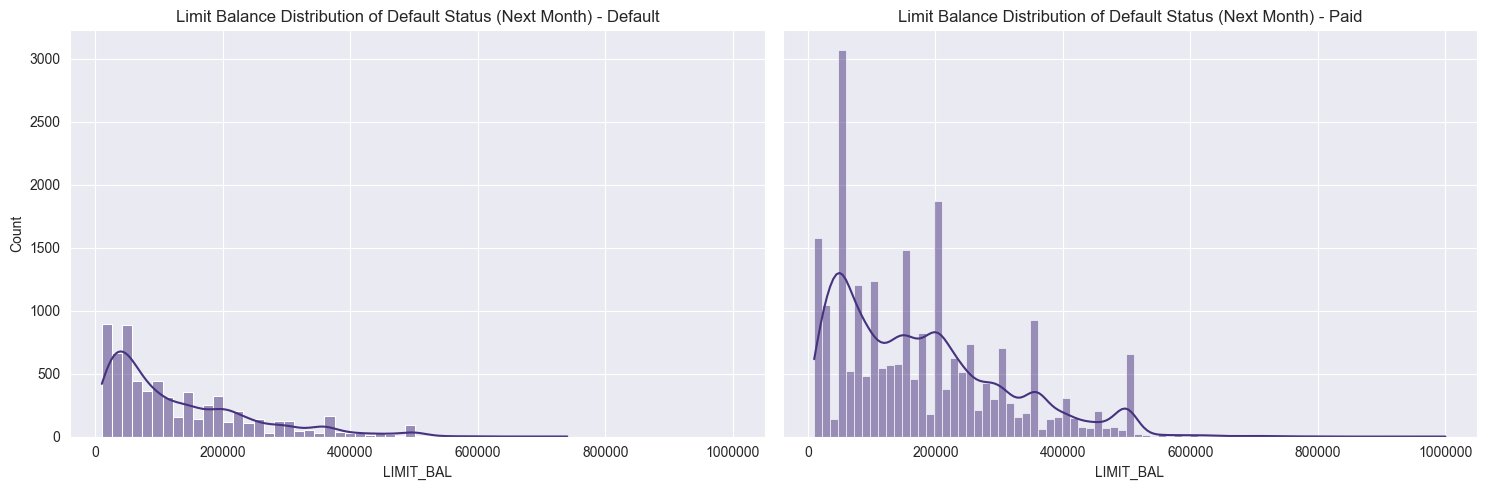

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

for i, hue in enumerate(df_eda['default.payment.next.month'].unique()):
    title = 'Limit Balance Distribution of Default Status (Next Month) - ' + hue
    
    filter = df_eda[df_eda['default.payment.next.month'] == hue]
    
    ax = sns.histplot(data=filter, x='LIMIT_BAL', kde=True, ax=axes[i])
        
    axes[i].set_title(title)
    
    print('Mean for ', hue, ':', filter['LIMIT_BAL'].mean())
    print('Median for ', hue, ':', filter['LIMIT_BAL'].median())

plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


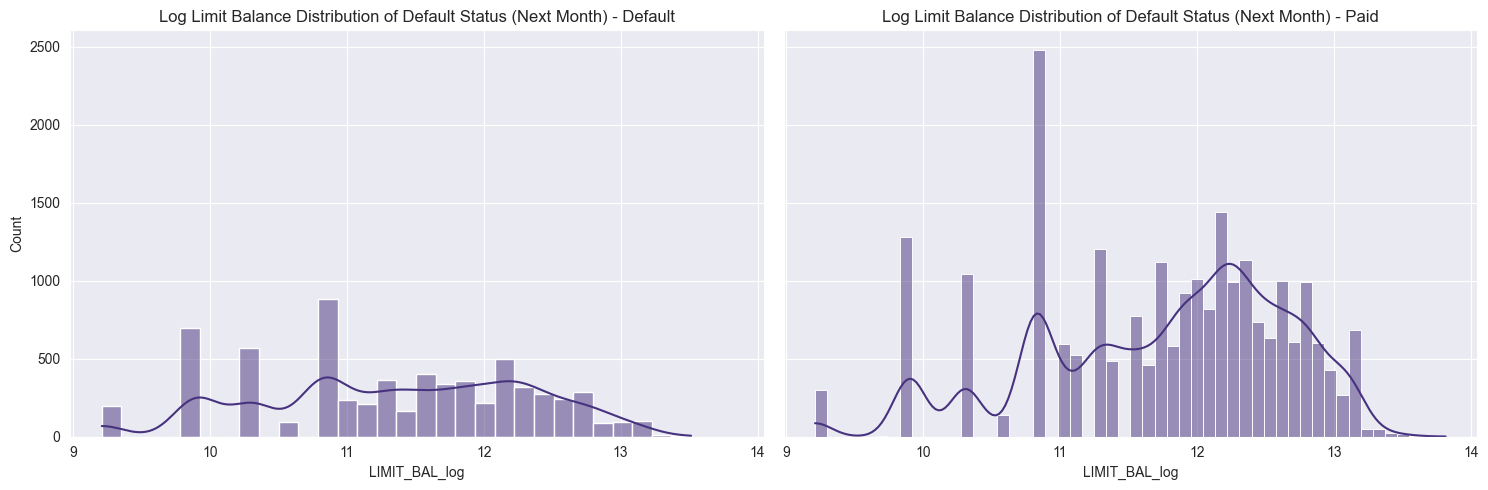

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

for i, hue in enumerate(df_eda['default.payment.next.month'].unique()):
    title = 'Log Limit Balance Distribution of Default Status (Next Month) - ' + hue
    
    filter = df_eda[df_eda['default.payment.next.month'] == hue]
    
    ax = sns.histplot(data=filter, x='LIMIT_BAL_log', kde=True, ax=axes[i])
        
    axes[i].set_title(title)
    
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


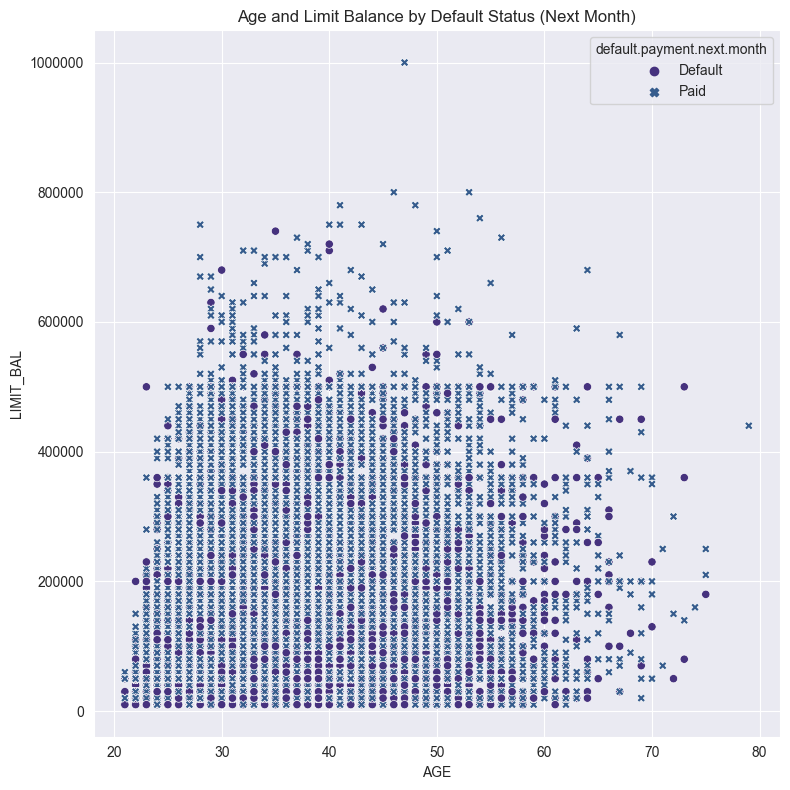

In [13]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df_eda, x='AGE', y='LIMIT_BAL', style='default.payment.next.month', hue='default.payment.next.month')

plt.title('Age and Limit Balance by Default Status (Next Month)')

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

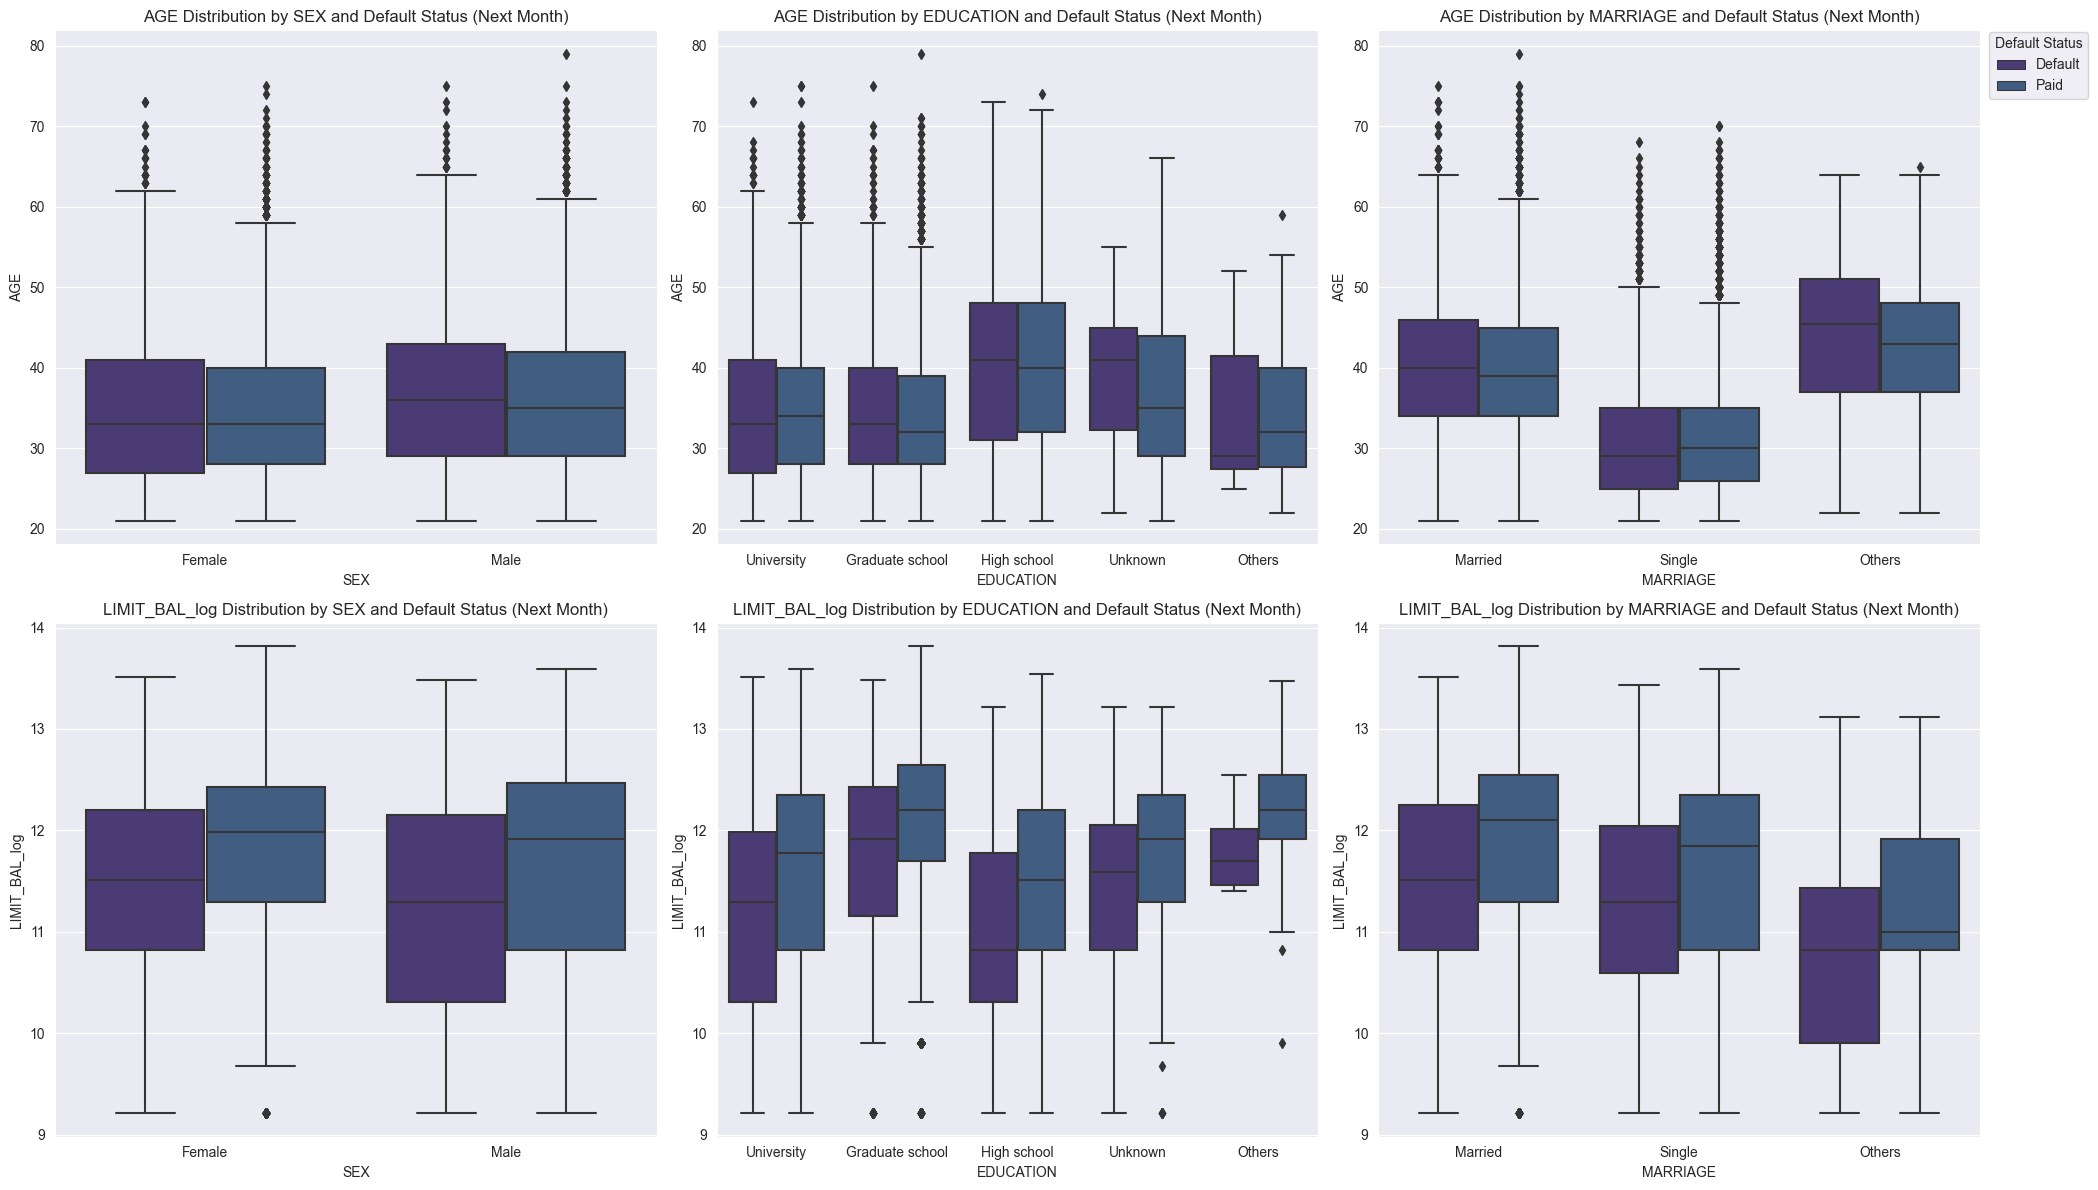

In [14]:
num_cols = ['AGE', 'LIMIT_BAL_log']

fig, axes = plt.subplots(len(num_cols), len(cat_cols[:-1]), figsize=(5 * len(cat_cols), 12))

for i, row in enumerate(num_cols):
    for j, col in enumerate(cat_cols[:-1]):
        title = row + ' Distribution by ' + col + ' and Default Status (Next Month)'
        
        sns.boxplot(df_eda, x=col, y=row, hue='default.payment.next.month', ax=axes[i][j])
        
        axes[i][j].set_title(title)
        axes[i][j].ticklabel_format(style='plain', axis='y')
        
        axes[i][j].legend_.remove()

handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 0.975), title="Default Status")

plt.tight_layout()
plt.show()

## Bill Amount and Pay Amount

In [15]:
bill_cols = [f'BILL_AMT{x}' for x in range(1, 7)]
print(bill_cols)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


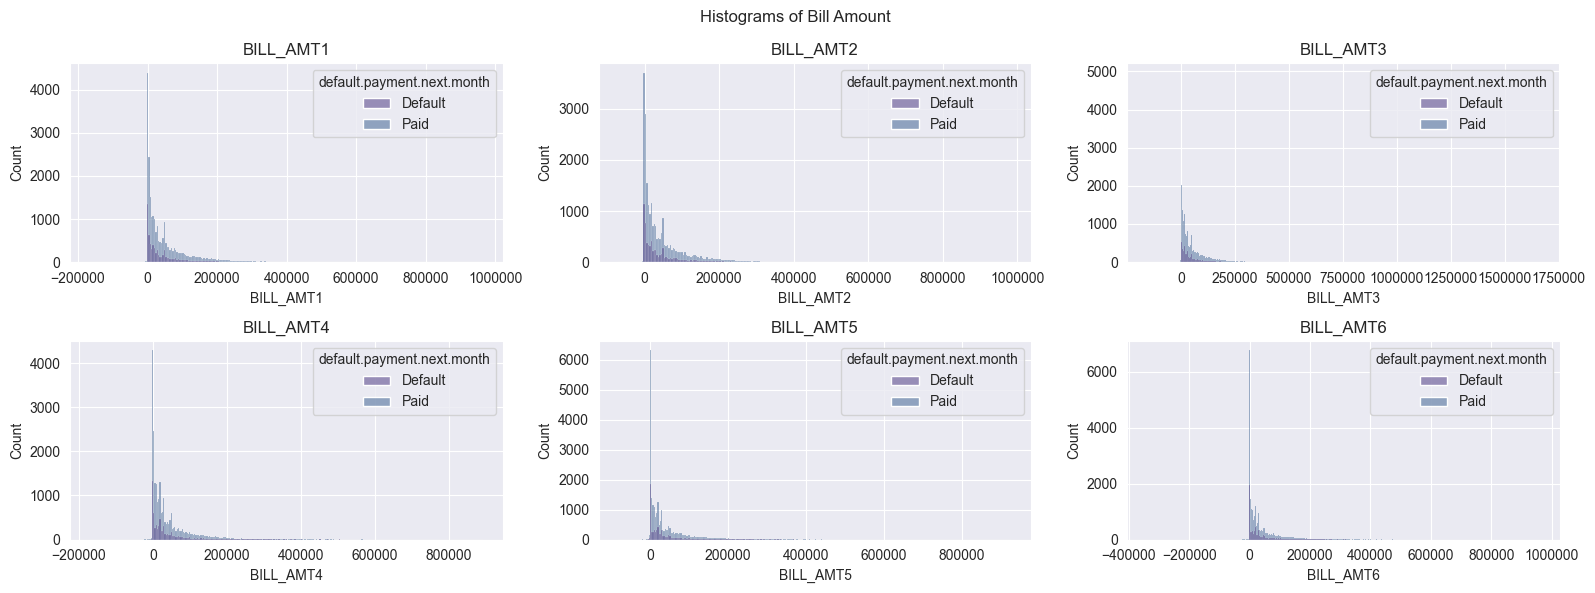

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(bill_cols):
    sns.histplot(df_eda, x=col, hue='default.payment.next.month', ax=axes[i])
    
    axes[i].set_title(col)
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].ticklabel_format(style='plain', axis='x')

    
plt.suptitle('Histograms of Bill Amount')

plt.tight_layout()
plt.show()

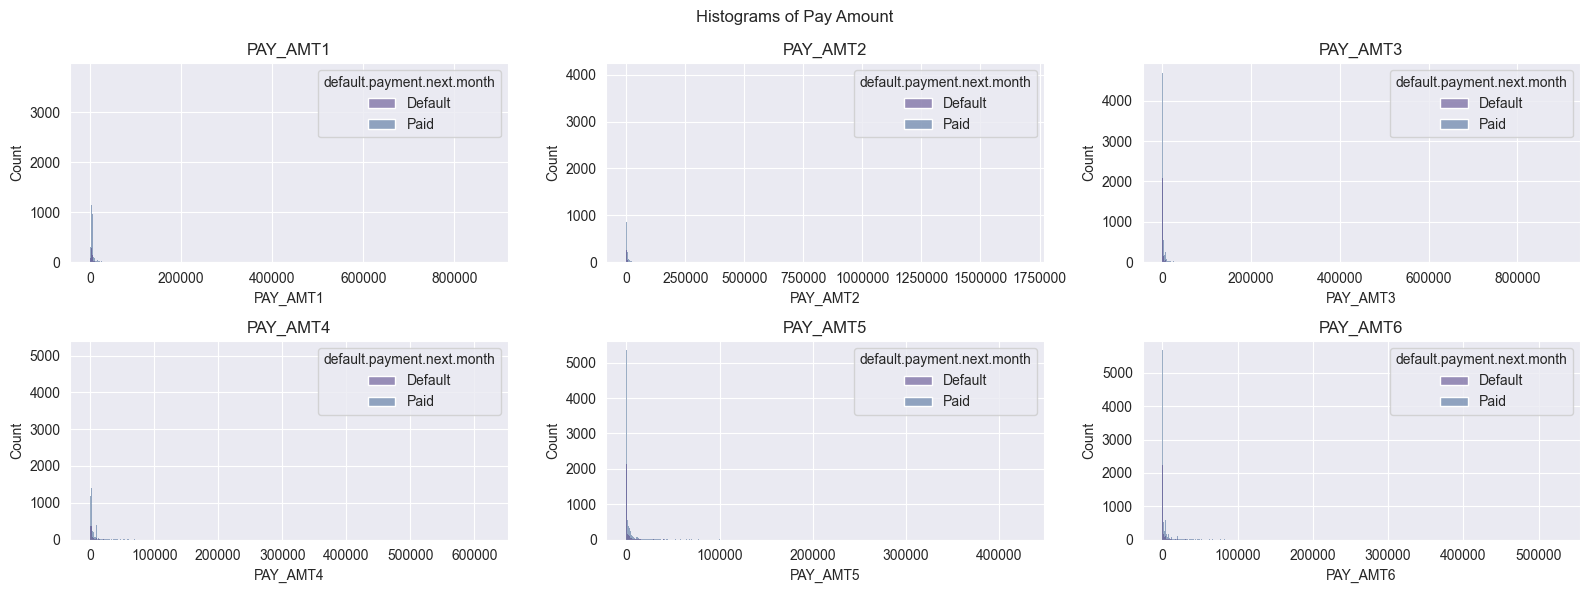

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(pay_cols):
    sns.histplot(df_eda, x=col, hue='default.payment.next.month', ax=axes[i])
    
    axes[i].set_title(col)
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].ticklabel_format(style='plain', axis='x')

    
plt.suptitle('Histograms of Pay Amount')

plt.tight_layout()
plt.show()

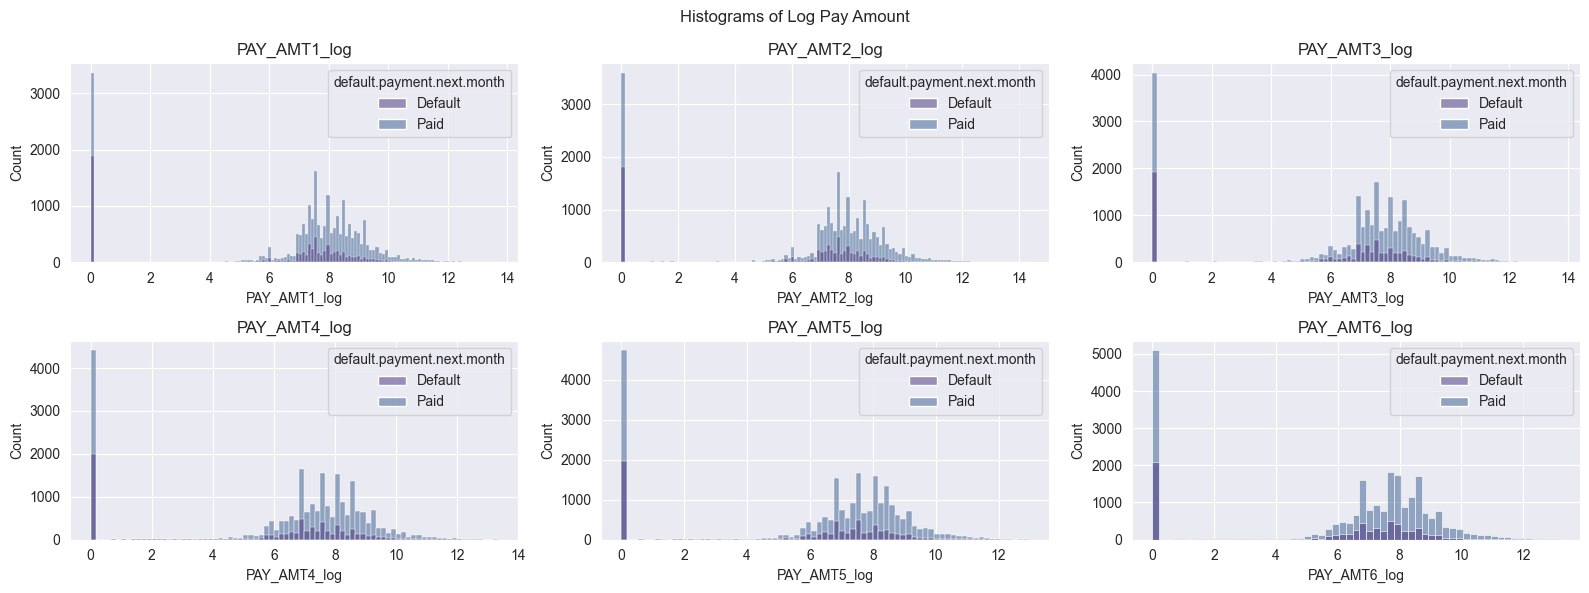

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(pay_cols_log):
    sns.histplot(df_eda, x=col, hue='default.payment.next.month', ax=axes[i])
    
    axes[i].set_title(col)
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].ticklabel_format(style='plain', axis='x')

    
plt.suptitle('Histograms of Log Pay Amount')

plt.tight_layout()
plt.show()

# Check Nulls and Unique Values

In [19]:
def checkNA(data):
    nullColls = []
    
    total = len(data)
    for col in data.columns:
        nulls = data[col].isna().sum()
        print(col, nulls, '|', (nulls/total) * 100)
        if nulls > 0:
            nullColls.append(col)
            
    return nullColls

def checkUnique(data):
    for col in data.columns:
        uniques = data[col].unique()
        print(col, '|', len(uniques))
        print(uniques)
        print('-' * 150)
        
def checkValCounts(data):
    for col in data.columns:
        print(data[col].value_counts())
        print('-' * 100)

In [20]:
nullCols = checkNA(df_mapped)

ID 0 | 0.0
LIMIT_BAL 0 | 0.0
SEX 0 | 0.0
EDUCATION 14 | 0.04666666666666667
MARRIAGE 54 | 0.18
AGE 0 | 0.0
PAY_0 0 | 0.0
PAY_2 0 | 0.0
PAY_3 0 | 0.0
PAY_4 0 | 0.0
PAY_5 0 | 0.0
PAY_6 0 | 0.0
BILL_AMT1 0 | 0.0
BILL_AMT2 0 | 0.0
BILL_AMT3 0 | 0.0
BILL_AMT4 0 | 0.0
BILL_AMT5 0 | 0.0
BILL_AMT6 0 | 0.0
PAY_AMT1 0 | 0.0
PAY_AMT2 0 | 0.0
PAY_AMT3 0 | 0.0
PAY_AMT4 0 | 0.0
PAY_AMT5 0 | 0.0
PAY_AMT6 0 | 0.0
default.payment.next.month 0 | 0.0
PAY_AMT1_log 0 | 0.0
PAY_AMT2_log 0 | 0.0
PAY_AMT3_log 0 | 0.0
PAY_AMT4_log 0 | 0.0
PAY_AMT5_log 0 | 0.0
PAY_AMT6_log 0 | 0.0
LIMIT_BAL_log 0 | 0.0


In [21]:
checkUnique(df_mapped)

ID | 30000
[    1     2     3 ... 29998 29999 30000]
------------------------------------------------------------------------------------------------------------------------------------------------------
LIMIT_BAL | 81
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
----------------------------------------

In [22]:
checkValCounts(df_mapped)

ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64
----------------------------------------------------------------------------------------------------
LIMIT_BAL
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: count, Length: 81, dtype: int64
----------------------------------------------------------------------------------------------------
SEX
Female    18112
Male      11888
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EDUCATION
University         14030
Graduate school    10585
High school         4917
Unknown              331
Others               123
Name: count, dtype: int64
---------------------------------------------------------------

## Imputation

In [23]:
for col in nullCols:
    print(col, '-' * 150)
    display(df_mapped[df_mapped[col].isna()])

EDUCATION ------------------------------------------------------------------------------------------------------------------------------------------------------


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_AMT1_log,PAY_AMT2_log,PAY_AMT3_log,PAY_AMT4_log,PAY_AMT5_log,PAY_AMT6_log,LIMIT_BAL_log
3769,3770,290000.0,Female,NaN,Single,38,1,-1,-1,-1,...,1481.0,0.0,0,7.271009,8.032360,7.249215,7.694848,7.301148,0.000000,12.577636
5945,5946,270000.0,Male,NaN,Single,39,1,-1,-1,-1,...,0.0,0.0,0,9.229555,11.159303,9.852668,5.991465,0.000000,0.000000,12.506177
6876,6877,360000.0,Male,NaN,Single,30,0,0,-1,0,...,1767.0,3300.0,0,10.043293,9.415809,10.126951,10.126991,7.477604,8.101981,12.793859
14631,14632,350000.0,Female,NaN,Single,53,-1,-1,-1,-1,...,6058.0,1153.0,0,8.484877,11.024350,10.029591,7.237059,8.709300,7.050989,12.765688
15107,15108,210000.0,Male,NaN,Single,45,-2,-2,-2,-2,...,3372.0,15381.0,0,8.675051,6.940222,6.670766,8.179200,8.123558,9.640953,12.254863
16881,16882,100000.0,Male,NaN,Single,37,0,0,-2,-2,...,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512925
16896,16897,200000.0,Male,NaN,Single,40,1,-2,-1,-1,...,0.0,0.0,0,0.000000,5.303305,6.908755,0.000000,0.000000,0.000000,12.206073
17414,17415,230000.0,Female,NaN,Single,47,-1,-1,-1,2,...,4838.0,3840.0,0,8.655911,7.377134,0.000000,8.598957,8.484463,8.253488,12.345835
19920,19921,50000.0,Female,NaN,Married,40,0,0,0,0,...,1921.0,8432.0,0,7.709757,7.740230,7.650169,7.824446,7.561122,9.039908,10.819778
20030,20031,200000.0,Female,NaN,Single,30,-1,-1,2,-1,...,7809.0,2886.0,0,7.965893,0.000000,9.155990,8.671630,8.963160,7.967973,12.206073


MARRIAGE ------------------------------------------------------------------------------------------------------------------------------------------------------


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_AMT1_log,PAY_AMT2_log,PAY_AMT3_log,PAY_AMT4_log,PAY_AMT5_log,PAY_AMT6_log,LIMIT_BAL_log
218,219,110000.0,Female,High school,NaN,31,0,0,0,0,...,3000.0,8954.0,0,8.294300,8.517393,8.006701,8.006701,8.006701,9.099967,11.608236
809,810,160000.0,Female,University,NaN,37,0,0,0,0,...,1098.0,426.0,0,10.488186,7.189922,6.793466,6.908755,7.002156,6.056784,11.982929
820,821,200000.0,Female,High school,NaN,51,-1,-1,-1,-1,...,390.0,390.0,0,0.000000,5.968708,6.660575,0.000000,5.968708,5.968708,12.206073
1019,1020,180000.0,Female,High school,NaN,45,-1,-1,-2,-2,...,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.100712
1443,1444,200000.0,Male,High school,NaN,51,-1,-1,-1,-1,...,4430.0,6398.0,0,8.521384,9.130972,7.835975,0.000000,8.396381,8.763897,12.206073
2146,2147,150000.0,Female,High school,NaN,55,-1,-1,-1,-1,...,1870.0,6800.0,0,9.769899,9.122711,7.986165,8.130648,7.534228,8.824825,11.918391
2554,2555,220000.0,Female,Graduate school,NaN,33,-1,-1,-1,-1,...,277.0,492.0,0,7.334329,6.849066,6.411818,7.461066,5.627621,6.200509,12.301383
3056,3057,200000.0,Male,High school,NaN,36,-2,-2,-2,-2,...,0.0,0.0,0,11.398502,9.559517,10.630070,9.120525,0.000000,0.000000,12.206073
4470,4471,70000.0,Male,High school,NaN,35,2,2,2,2,...,2100.0,2000.0,0,7.696667,7.550135,7.601402,7.650169,7.650169,7.601402,11.156251
5005,5006,90000.0,Female,High school,NaN,24,-2,-2,-2,-1,...,5.0,13162.0,0,9.908923,8.294300,9.515985,2.708050,1.791759,9.485165,11.407565


In [24]:
df_impute = df_mapped.copy()

cat_imputer = SimpleImputer(strategy="most_frequent")
df_impute[nullCols] = cat_imputer.fit_transform(df_impute[nullCols])

_ = checkNA(df_impute)

ID 0 | 0.0
LIMIT_BAL 0 | 0.0
SEX 0 | 0.0
EDUCATION 0 | 0.0
MARRIAGE 0 | 0.0
AGE 0 | 0.0
PAY_0 0 | 0.0
PAY_2 0 | 0.0
PAY_3 0 | 0.0
PAY_4 0 | 0.0
PAY_5 0 | 0.0
PAY_6 0 | 0.0
BILL_AMT1 0 | 0.0
BILL_AMT2 0 | 0.0
BILL_AMT3 0 | 0.0
BILL_AMT4 0 | 0.0
BILL_AMT5 0 | 0.0
BILL_AMT6 0 | 0.0
PAY_AMT1 0 | 0.0
PAY_AMT2 0 | 0.0
PAY_AMT3 0 | 0.0
PAY_AMT4 0 | 0.0
PAY_AMT5 0 | 0.0
PAY_AMT6 0 | 0.0
default.payment.next.month 0 | 0.0
PAY_AMT1_log 0 | 0.0
PAY_AMT2_log 0 | 0.0
PAY_AMT3_log 0 | 0.0
PAY_AMT4_log 0 | 0.0
PAY_AMT5_log 0 | 0.0
PAY_AMT6_log 0 | 0.0
LIMIT_BAL_log 0 | 0.0


In [25]:
df_impute.to_csv('data/UCI_Credit_Card_CLEAN.csv', index=False)

# Risk Probability
Using gradient boosting models to determine probability of defaulting next month's payment

In [ ]:
df_impute = pd.read_csv('data/UCI_Credit_Card_CLEAN.csv')

In [26]:
df = df_impute.copy()

target = 'default.payment.next.month'
drop = ['ID', 'LIMIT_BAL'] + pay_cols
features = [col for col in df.columns if col not in drop + [target]]

print(len(features))
print(features)

23
['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log', 'LIMIT_BAL_log']


In [27]:
X = df[features]
y = df[target]

# Chi Square and T Test

In [28]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [29]:
cat_cols = [col for col in features if col in df.select_dtypes(include='object').columns.tolist()]
num_cols = [col for col in features if col in df.select_dtypes(include='number').columns.tolist()]

print(len(cat_cols), cat_cols)
print(len(num_cols), num_cols)

keep = []

3 ['SEX', 'EDUCATION', 'MARRIAGE']
20 ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log', 'LIMIT_BAL_log']


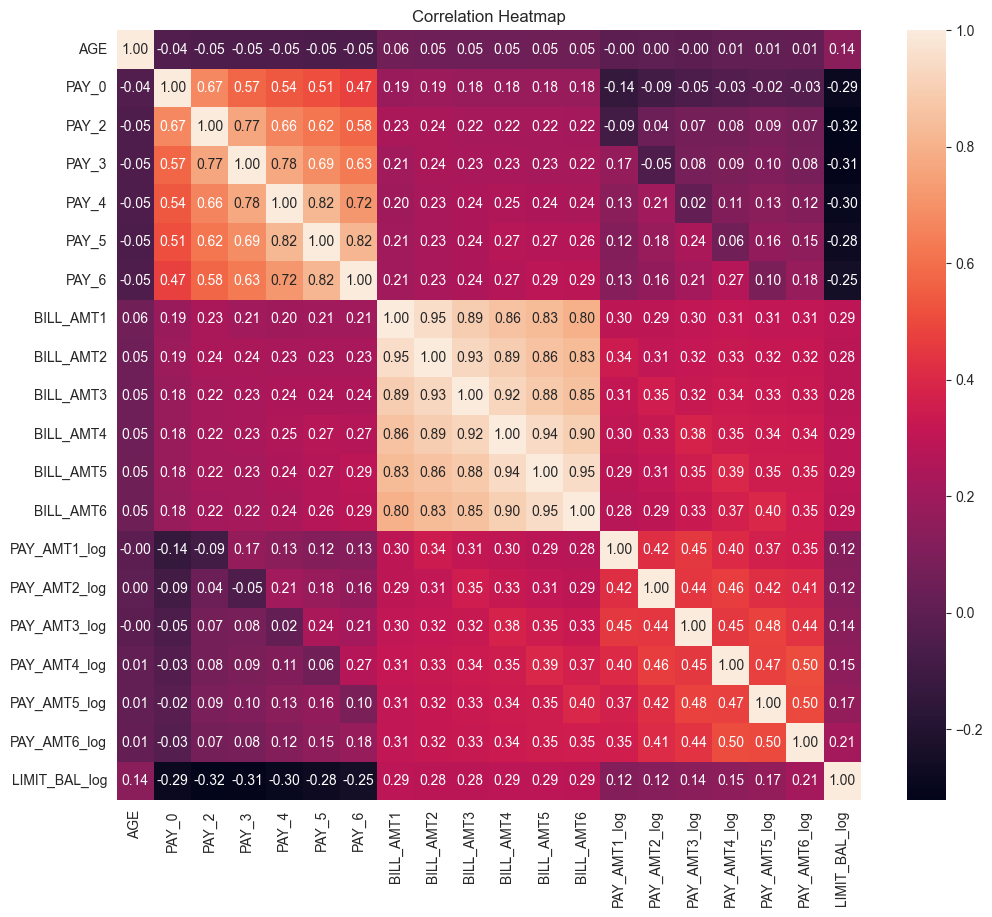

In [30]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## Chi Square for Categorical

In [31]:
for col in cat_cols:
    ct_table_ind=pd.crosstab(X[col], y)
    print('contingency_table :\n',ct_table_ind)

    # compute the chi2 stat and get the value
    c_stat, p, dof, expected = chi2_contingency(ct_table_ind)

    print("Chi2 statistic: ", c_stat)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))

    if p <= alpha:
        print('Dependent (reject H0)')
        keep.append(col)
    else:
        print('Independent (H0 holds true)')

    print()

print('Relevant categorical columns:\n', keep)

contingency_table :
 default.payment.next.month      0     1
SEX                                    
Female                      14349  3763
Male                         9015  2873
Chi2 statistic:  47.708796890621116
p value is 4.944678999412026e-12
Dependent (reject H0)

contingency_table :
 default.payment.next.month      0     1
EDUCATION                              
Graduate school              8549  2036
High school                  3680  1237
Others                        116     7
University                  10714  3330
Unknown                       305    26
Chi2 statistic:  156.49664507553868
p value is 8.244709952928782e-33
Dependent (reject H0)

contingency_table :
 default.payment.next.month      0     1
MARRIAGE                               
Married                     10453  3206
Others                        239    84
Single                      12672  3346
Chi2 statistic:  31.408475800840222
p value is 1.5126419390778658e-07
Dependent (reject H0)

Relevant categorical

## T-Test for Numerical

In [32]:
for col in num_cols:
    t, p = stats.ttest_ind(X[col], y)
    print(col)
    print("T-Statistic:", t)
    print("P-Value:", p)
    
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))

    if p <= alpha:
        print('Dependent (reject H0)')
        keep.append(col)
    else:
        print('Independent (H0 holds true)')

    print()

print('Relevant categorical columns:\n', keep)

AGE
T-Statistic: 661.9480241120837
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

PAY_0
T-Statistic: -34.395206563022164
P-Value: 9.493545724203387e-257
p value is 9.493545724203387e-257
Dependent (reject H0)

PAY_2
T-Statistic: -48.52202440419104
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

PAY_3
T-Statistic: -52.96806138232845
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

PAY_4
T-Statistic: -61.689291644655604
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

PAY_5
T-Statistic: -69.95315523649265
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

PAY_6
T-Statistic: -72.5773347739232
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

BILL_AMT1
T-Statistic: 120.48617049794927
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

BILL_AMT2
T-Statistic: 119.67930767737906
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

BILL_AMT3
T-Statistic: 117.41818151209422
P-Value: 0.0
p value is 0.0
Dependent (reject H0)

BILL_AMT4
T-Statistic: 116.4774068297942
P-Value: 0.0
p value 

In [33]:
notNeeded = set(features).difference(set(keep))

print('Features not relevant:', len(notNeeded), notNeeded)
print('Relevant features:', len(keep), keep)

X = X[keep]

Features not relevant: 0 set()
Relevant features: 23 ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log', 'LIMIT_BAL_log']


# Preprocessing

In [34]:
from sklearn.model_selection import train_test_split

In [38]:
# 20 % testing, 10% validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=5)

print(df.shape)

print()
print(X_train.shape)
print(len(y_train))

print()
print(X_valid.shape)
print(len(y_valid))

print()
print(X_test.shape)
print(len(y_test))

(30000, 32)

(21600, 23)
21600

(2400, 23)
2400

(6000, 23)
6000


## Encoding
https://www.geeksforgeeks.org/blogs/machine-learning-pipeline/

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

In [40]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include='number').columns.tolist()

print(cat_cols)
print(num_cols)

['SEX', 'EDUCATION', 'MARRIAGE']
['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log', 'LIMIT_BAL_log']


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Stacking

# Gradient Boosting Model - XGBoost
https://forecastegy.com/posts/xgboost-hyperparameter-tuning-with-optuna/

## Optuna

In [42]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import optuna

from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [43]:
cat_cols_index = np.where(X_train.dtypes == "object")[0]

def objective(trial):
    # Random Forest hyperparameters
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000)
    rf_max_depth = trial.suggest_int("rf_max_depth", 3, 20)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10)

    # XGBoost hyperparameters
    xgb_n_estimators = trial.suggest_int("xgb_n_estimators", 100, 1000)
    xgb_max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
    xgb_lr = trial.suggest_float("xgb_learning_rate", 0.01, 0.1)
    xgb_subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
    xgb_colsample = trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0)
    xgb_min_child_weight = trial.suggest_int("xgb_min_child_weight", 1, 20)

    # Base models
    rf = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        random_state=5
    )

    xgb = XGBClassifier(
        n_estimators=xgb_n_estimators,
        max_depth=xgb_max_depth,
        learning_rate=xgb_lr,
        subsample=xgb_subsample,
        colsample_bytree=xgb_colsample,
        min_child_weight=xgb_min_child_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=5
    )

    # Stacking model
    stack_model = StackingClassifier(
        estimators=[('rf', rf), ('xgb', xgb)],
        final_estimator=LogisticRegression(),
        cv=5,
        passthrough=True,
        n_jobs=-1
    )

    # Full pipeline
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTENC(categorical_features=cat_cols_index.tolist(), random_state=42)),
        ('stack', stack_model)
    ])

    # Stratified CV ROC-AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)

    return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params

print("Best ROC-AUC:", study.best_value)
print("Best hyperparameters:", best_params)

# 108 mins

[I 2025-08-27 17:39:17,836] A new study created in memory with name: no-name-80d36fa1-b90c-44ab-bbc3-9abf8f2a2bc2


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-27 17:40:17,817] Trial 0 finished with value: 0.7472503787299172 and parameters: {'rf_n_estimators': 327, 'rf_max_depth': 5, 'rf_min_samples_split': 6, 'xgb_n_estimators': 385, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.06051941656853008, 'xgb_subsample': 0.5128248682238097, 'xgb_colsample_bytree': 0.9506557614942672, 'xgb_min_child_weight': 2}. Best is trial 0 with value: 0.7472503787299172.
[I 2025-08-27 17:45:46,750] Trial 1 finished with value: 0.7544215802348017 and parameters: {'rf_n_estimators': 903, 'rf_max_depth': 17, 'rf_min_samples_split': 4, 'xgb_n_estimators': 239, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.04301659237223105, 'xgb_subsample': 0.846823595992806, 'xgb_colsample_bytree': 0.7391694340238124, 'xgb_min_child_weight': 14}. Best is trial 1 with value: 0.7544215802348017.
[I 2025-08-27 17:47:02,127] Trial 2 finished with value: 0.7537980354349715 and parameters: {'rf_n_estimators': 203, 'rf_max_depth': 16, 'rf_min_samples_split': 4, 'xgb_n_estimators':

## Model Output

In [45]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, classification_report, confusion_matrix

In [46]:
best_rf = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
    random_state=42
)

best_xgb = XGBClassifier(
    n_estimators=best_params['xgb_n_estimators'],
    max_depth=best_params['xgb_max_depth'],
    learning_rate=best_params['xgb_learning_rate'],
    subsample=best_params['xgb_subsample'],
    colsample_bytree=best_params['xgb_colsample_bytree'],
    min_child_weight=best_params['xgb_min_child_weight'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

stack_model = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

final_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_cols_index.tolist(), random_state=42)),
    ('stack', stack_model)
])

final_pipeline.fit(X_train, y_train)

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1_log',
                                                   'PAY_AMT2_log',
                                                   'PAY_AMT3_log',
                                                   'PAY_AMT4_log',
                                                   'PAY_AMT5_log',
                                                   'PAY_AMT6_log',
                                                   'LIMIT_BAL_log']),
                                                 ('cat...
                                                               interaction_constraints=None,
                                                               learning_rate=0.016601665734928175,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=4,
                                                               max_leaves=None,
                                                               min_child_weight=9,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=114,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1, passthrough=True))])

In [47]:
y_test_proba = final_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)
print(f'Test ROC-AUC: {roc_auc:.4f}, PR-AUC: {pr_auc:.4f}')

Test ROC-AUC: 0.7779, PR-AUC: 0.5572


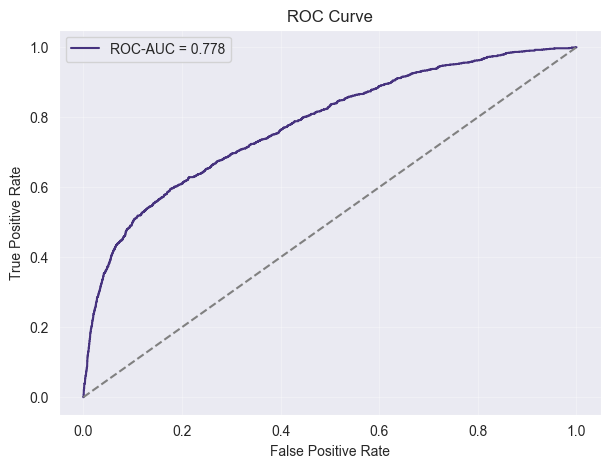

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [49]:
y_pred = (y_test_proba >= 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4661
           1       0.46      0.62      0.53      1339

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000



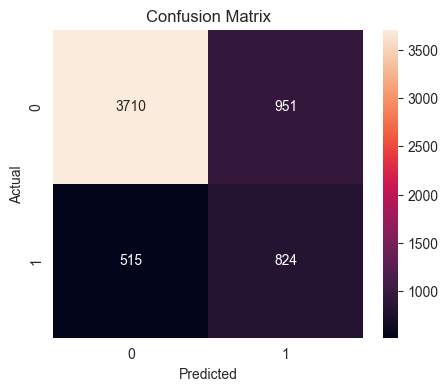

In [50]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance with Permutation

In [51]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(final_pipeline, X_valid, y_valid, n_repeats=10, scoring='roc_auc', n_jobs=-1)
perm_df = pd.DataFrame({'feature': X_valid.columns, 'importance': result.importances_mean})
perm_df = perm_df.sort_values('importance', ascending=False)
print(perm_df.head(10))

                      feature  importance
1                       PAY_0    0.156042
2                       PAY_2    0.143231
4                       PAY_4    0.098440
5                       PAY_5    0.092151
3                       PAY_3    0.089302
6                       PAY_6    0.046949
14               PAY_AMT2_log    0.025494
25       EDUCATION_University    0.022287
15               PAY_AMT3_log    0.022238
27           MARRIAGE_Married    0.022118
10                  BILL_AMT4    0.021837
19              LIMIT_BAL_log    0.021154
13               PAY_AMT1_log    0.020432
16               PAY_AMT4_log    0.019353
23      EDUCATION_High school    0.018626
7                   BILL_AMT1    0.018464
0                         AGE    0.017958
12                  BILL_AMT6    0.016617
18               PAY_AMT6_log    0.016494
11                  BILL_AMT5    0.016190
22  EDUCATION_Graduate school    0.015998
17               PAY_AMT5_log    0.015732
8                   BILL_AMT2    0

## Adding Probability to Dataset
https://stackoverflow.com/questions/61951360/how-to-merge-predicted-values-back-to-original-dataframe-in-pandas-and-sklearn

In [52]:
df['default_probability'] = 0.0  # initialize

df.loc[X_train.index, 'default_probability'] = final_pipeline.predict_proba(X_train)[:, 1]
df.loc[X_valid.index, 'default_probability'] = final_pipeline.predict_proba(X_valid)[:, 1]
df.loc[X_test.index,  'default_probability'] = final_pipeline.predict_proba(X_test)[:, 1]

display(df.shape)
display(df.head())

(30000, 33)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default.payment.next.month,PAY_AMT1_log,PAY_AMT2_log,PAY_AMT3_log,PAY_AMT4_log,PAY_AMT5_log,PAY_AMT6_log,LIMIT_BAL_log,default_probability
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,1,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,9.903488,0.797902
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,2000.0,1,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,11.695247,0.576129
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,5000.0,0,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,11.407565,0.284666
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,1000.0,0,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,10.819778,0.365916
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,679.0,0,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,10.819778,0.179942


In [53]:
df['default_probability'].describe()

count    30000.000000
mean         0.407780
std          0.239956
min          0.019120
25%          0.209220
50%          0.348187
75%          0.549736
max          0.965512
Name: default_probability, dtype: float64

In [55]:
df.to_csv('data/UCI_Credit_Card_Analysis.csv', index=False)

# Analysis
After sorting risk probability to high, medium, and low, we investigate and find patterns in the demographic information of people who fall into each category

In [3]:
df = pd.read_csv('data/UCI_Credit_Card_Analysis.csv')
display(df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default.payment.next.month,PAY_AMT1_log,PAY_AMT2_log,PAY_AMT3_log,PAY_AMT4_log,PAY_AMT5_log,PAY_AMT6_log,LIMIT_BAL_log,default_probability
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,1,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,9.903488,0.797902
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,2000.0,1,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,11.695247,0.576129
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,5000.0,0,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,11.407565,0.284666
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,1000.0,0,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,10.819778,0.365916
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,679.0,0,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,10.819778,0.179942


In [6]:
target = 'default.payment.next.month'

In [144]:
# for i, hue in enumerate(target):

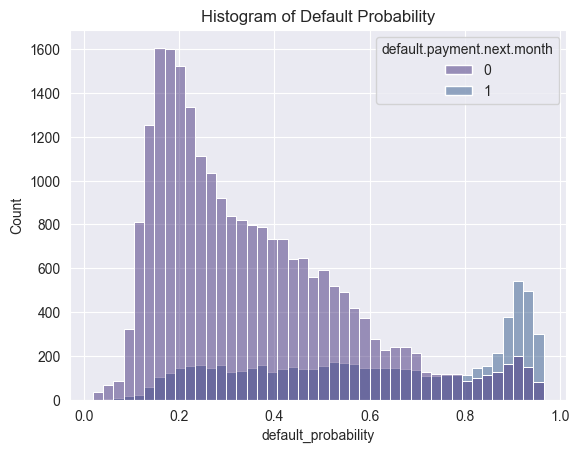

In [10]:
sns.histplot(data=df, x='default_probability', hue=target)
plt.title('Histogram of Default Probability')
plt.show()

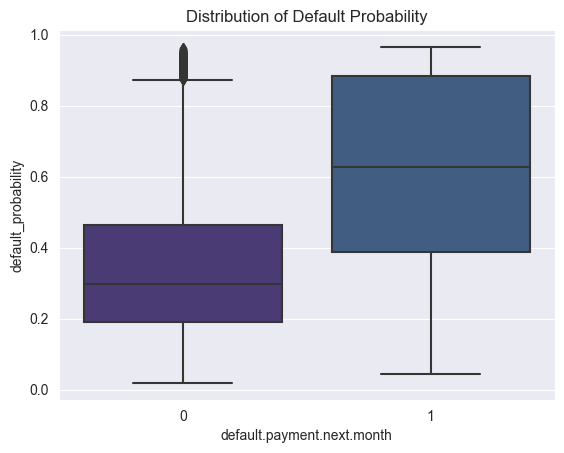

In [13]:
sns.boxplot(data=df, x=target, y="default_probability")
plt.title('Distribution of Default Probability')
plt.show()

## EDA

## Feature Importance

# End